In [1]:
import pandas as pd

In [2]:
data_set=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
data_set

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### 1) Replace the NaN values with correct value. And justify why you have chosen the same.

In [4]:
data_set=data_set.drop("sl_no",axis=1)
#No need of sl_no column so drop that column

In [5]:
data_set=data_set.dropna(how='all')
# Remove rows where all values are NaN
# 2 empty rows are deleted now

In [6]:
data_set.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
def Univariate(data):
    Qual=[]
    Quan=[]
    for y in data_set.columns:
        if data_set[y].dtype=='O':
            Qual.append(y)
        else:
            Quan.append(y)
    return Qual,Quan

In [8]:
qual,quan=Univariate(data_set)

In [9]:
#Here salary columns only had null value because of the Not Placed students
#so we replaced the zero to not placed students data

In [10]:
#To check the all data in status column
data_set['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [11]:
#To check the if Placed students have null value are not in salary column
data_set[(data_set['status'] == 'Placed')].isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
data_set[(data_set['status'] == 'Not Placed')].isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
#Placed categorie data doesn't have null value, so replaced the null value to 0 because of the student's not placed.
data_set["salary"]=data_set["salary"].fillna(0)
data_set.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### 2)How many of them are not placed?

In [14]:
data_set["status"].value_counts()
#To get the total values in categorical data, use frequency.
#Placed,Not=data_set["status"].value_counts()
#67 of the students are Not Placed

status
Placed        148
Not Placed     67
Name: count, dtype: int64

### 3)Find the reason for non placement from the dataset?

In [68]:
#In this dataset tells about studens details, so we can compare there mark who all are not placed.In correlation or anova

In [93]:
#store the placed and not placed student in seprate variable, for easy to find result.
data_1=data_set[(data_set['status'] == 'Placed')]
data_2=data_set[(data_set['status'] == 'Not Placed')]

In [97]:
#placed student data
data_1[quan].mean()

ssc_p           71.721486
hsc_p           69.926554
degree_p        68.740541
etest_p         73.238041
mba_p           62.579392
salary      288655.405405
dtype: float64

In [98]:
#not placed student data
data_2[quan].mean()

ssc_p       57.544030
hsc_p       58.395522
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
salary       0.000000
dtype: float64

In [99]:
#not placed student average score was less score compare to placed student, so there student got less score in ssc_p and hsc_p that why there it affected the other score.
#so there not getting the placement due to there scores

### 4)What kind of relation between salary and mba_p ?

In [16]:
data_set[["salary","mba_p"]].corr()

,salary,mba_p
salary,1.000000,0.139823
mba_p,0.139823,1.000000


In [18]:
#Correlation value was 0.13 so it week relation between salary and mba_p

### 5)Which specialization is getting minimum salary?

In [20]:
data_set["specialisation"].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [157]:
placed=data_set[(data_set['status'] == 'Placed')]
placed.groupby("specialisation")["salary"].min()

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

In [38]:
#we replaced the 0 values to not placed student so we have to not placed to find the min salary else we can give more then 0 condition

In [39]:
filtered=data_set[data_set["salary"]>0]

In [40]:
filtered.groupby("specialisation")["salary"].min()

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64

In [41]:
# mins salary of Mkt&Fin : 200000.0 and Mkt&HR : 200000.0

### 6)How many of them getting above 500000 salary?

In [57]:
fill=data_set[data_set["salary"]>500000]

In [58]:
fill

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
121,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
152,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
179,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [60]:
print("Total no of students getting above 500000 Salary :",fill.shape[0])

Total no of students getting above 500000 Salary : 3


### 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [164]:
import scipy.stats as stats
s_value,p_value=stats.f_oneway(data_set["etest_p"],data_set["mba_p"])
float(p_value)
print('{:.30f}'.format(p_value)) 

0.000000000000000000004672547689


In [165]:
#p_value was 0.00<0.05 so it reject the Null hypothesis, there is Signifance diffrent between etest_p and mab_p

### 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [100]:
#for this we have to find the similarity so we use T_test

In [102]:
from scipy.stats import ttest_ind
Sci=data_set[data_set["degree_t"]=="Sci&Tech"]["salary"]
Spe=data_set[data_set["specialisation"]=="Mkt&HR"]["salary"]
ttest_ind(Sci,Spe)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))

In [ ]:
#P_value was <0.05 so it reject the null hypothesis, means degree_t(Sci&Tech) and specialisation(Mkt&HR) have similarity with salary.

### 9)Convert the normal distribution to standard normal distribution for salary column

In [104]:
def StdNDgraph(data):
    import seaborn as sns
    from scipy import stats
    ##Find the z_scoer value
    z_score=stats.zscore(data)
    sns.distplot(z_score,kde=True)

C:\Users\smani\AppData\Local\Temp\ipykernel_12104\2616129045.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


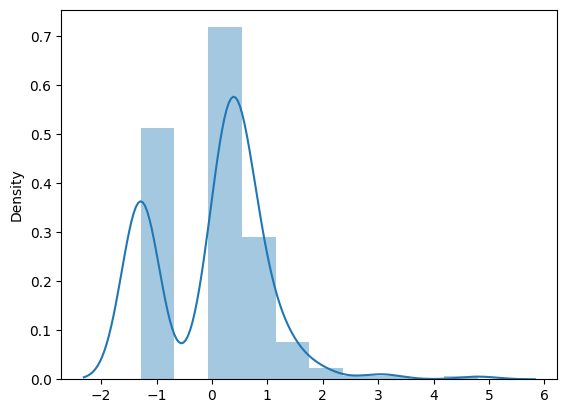

In [105]:
StdNDgraph(data_set["salary"])

In [109]:
#This digram not in ball shape means salary columns was not normally distributed

### 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [110]:
def pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    #To plot the diagram 
    ai=sns.distplot(dataset,kde=True,kde_kws={"color":"Green"},color="blue")
    pyplot.axvline(startrange,color="Red")
    pyplot.axvline(endrange,color="Red")
    sample=dataset
    
    #calculate mean and std
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean=%.3f, Standard Deviation=%.3f" % (sample_mean,sample_std))
    
    #define the distribution this is for normal distribution
    dist=norm(sample_mean,sample_std)
    
    #Total range presentage which means starting and ending range density value
    values=[value for value in range(startrange, endrange)]
    probabilites = [dist.pdf(value) for value in values]
    prob=sum(probabilites)
    print("The area between the range({},{}):{}".format(startrange,endrange,sum(probabilites)))
    return prob

C:\Users\smani\AppData\Local\Temp\ipykernel_12104\711953059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ai=sns.distplot(dataset,kde=True,kde_kws={"color":"Green"},color="blue")


Mean=198702.326, Standard Deviation=154780.927
The area between the range(700000,900000):0.0005973310593974868


np.float64(0.0005973310593974868)

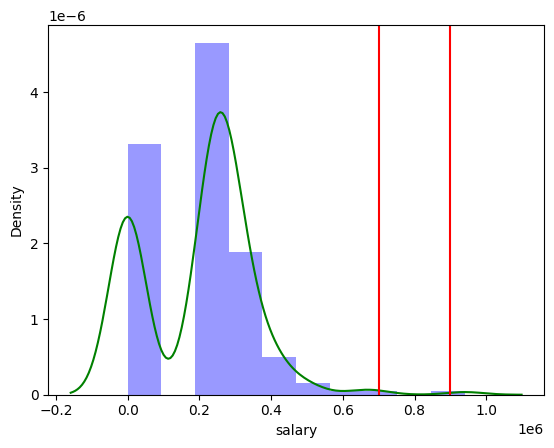

In [111]:
pdf_probability(data_set["salary"],700000,900000)

In [112]:
#we got the 0.0005 0.5% of the salary range from 700000 to 900000 in total percentage in salary column.

### 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [114]:
from scipy.stats import ttest_rel
e_test=data_set[data_set["degree_t"]=="Sci&Tech"]["etest_p"]
mba_p=data_set[data_set["degree_t"]=="Sci&Tech"]["mba_p"]
ttest_rel(e_test,mba_p)

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.517920600505392e-06), df=np.int64(58))

In [115]:
#p_value was >0.05 meaning it's Null hypothesis. degree_t(Sci&Tech) students have no similarity between etest_p and mba_p, more different.

### 12)Which parameter is highly correlated with salary?

In [64]:
data_set[quan].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [65]:
#ssc_p was highly correlated with salary 0.53 Moderate correlation

### 13) plot any useful graph and explain it.

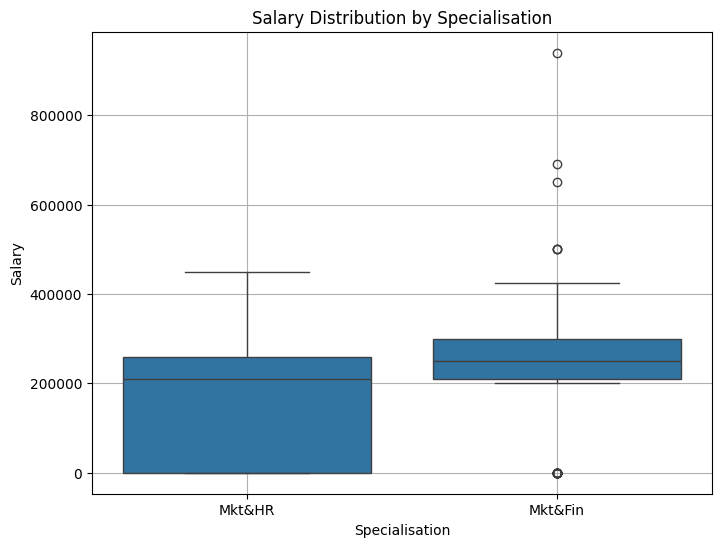

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='specialisation', y='salary', data=data_set)
plt.title('Salary Distribution by Specialisation')
plt.xlabel('Specialisation')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
#Specialisation Mk&Fin students getting more salary compared to Mkt&HR students

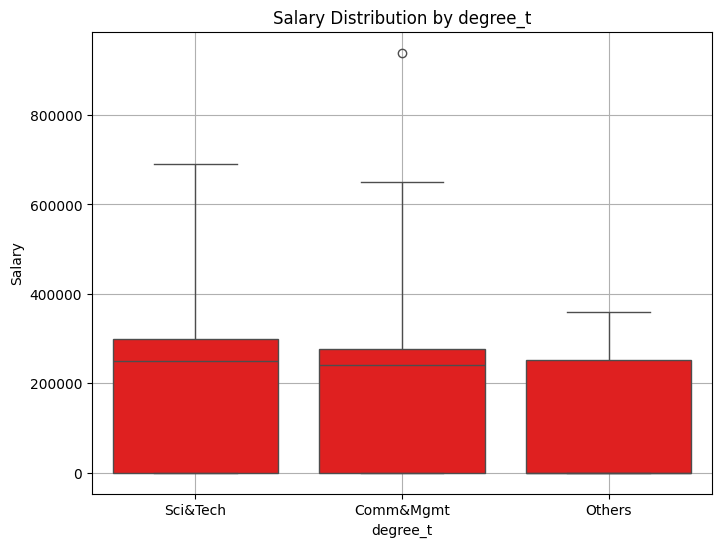

In [134]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='degree_t', y='salary', data=data_set,color='red')
plt.title('Salary Distribution by degree_t')
plt.xlabel('degree_t')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
#Sci&Tech students are getting more salary compared to other students 

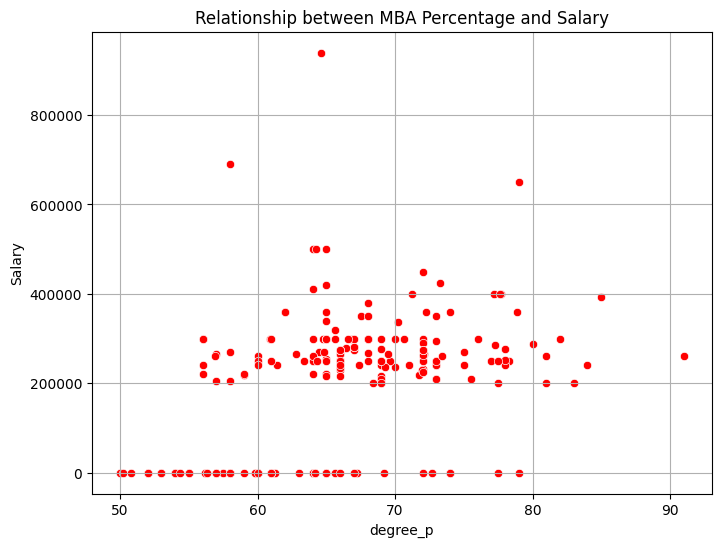

In [146]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='degree_p', y='salary', data=data_set,color='red')
plt.title('Relationship between MBA Percentage and Salary')
plt.xlabel('degree_p')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
#Many of the sudents are getting high salary who are marked 60 to 80 in degree.

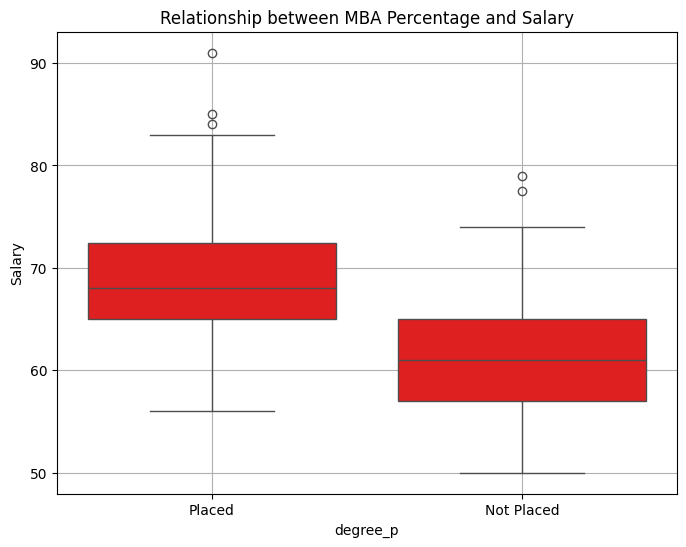

In [149]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='degree_p', x='status', data=data_set,color='red')
plt.title('Relationship between MBA Percentage and Salary')
plt.xlabel('degree_p')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [150]:
#not placed students are mark was between 56 to 64.
#placed students marked was between 65 to 73.